
# Multiple impulses transfer between Earth and Venus
This example demonstrates the use of the class pl2pl_N_impulses available from the trajopt module to assemble an unconstrained optimization problem representing an impulsive transfer between the Earth and Venus. Multiple impulses are allowed (the optimal number is in this case 3) allowing to study the complexification of the objective function landscape as the number of impulses increase.

In [1]:
# Imports
import pykep as pk
import pygmo as pg
import numpy as np

# Plotting imports
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [2]:
# We define the optimization problem
udp = pk.trajopt.pl2pl_N_impulses(
    start=pk.planet.jpl_lp('earth'),
    target=pk.planet.jpl_lp('venus'),
    N_max=3,
    tof=[100., 1000.],
    vinf=[0., 4],
    phase_free=False,
    multi_objective=False,
    t0=[pk.epoch(0), pk.epoch(1000)])
# All pykep problems in the module trajopt are compatible with pygmo.
# So we create a pygmo problem from the pykep udp (User Defined Problem)
prob = pg.problem(udp)
print(prob)

Problem name: <class 'pykep.trajopt._pl2pl_N_impulses.pl2pl_N_impulses'>
	Global dimension:			7
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [0, 100, 0.001, 0, 0, ... ]
	Upper bounds: [1000, 1000, 0.999, 1, 1, ... ]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0

	Thread safety: none



In [27]:
# Here we define the solution strategy, which in this simple case is to use
# Covariance Matrix adaptation Evolutionary Strategy (CMA-ES)
uda = pg.cmaes(gen=1000, force_bounds = True)
algo = pg.algorithm(uda)
# Here we activate some degree of screen output (will only show in the terminal)
algo.set_verbosity(10)
# We construct a random population of 20 individuals (the initial guess)
pop = pg.population(prob, size = 20, seed = 123)
# We solve the problem
pop = algo.evolve(pop)

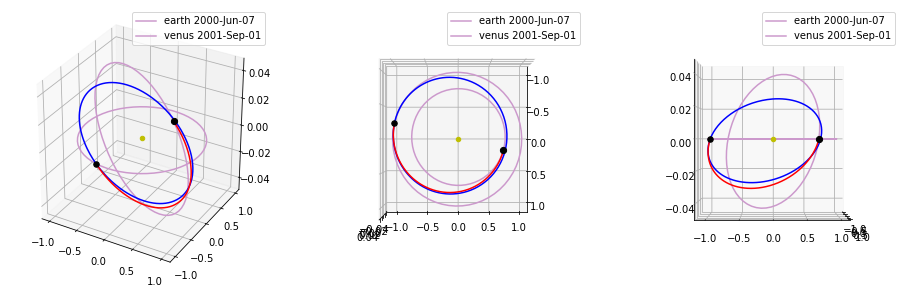

In [29]:
# Plot our trajectory
fig = plt.figure(figsize = (16,5))
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax1 = udp.plot(pop.champion_x, axes = ax1)
ax2 = udp.plot(pop.champion_x, axes = ax2)
ax2.view_init(elev=90, azim=0) 
ax3 = udp.plot(pop.champion_x, axes = ax3)
ax3.view_init(elev=0, azim=0) 


In [28]:
# Inspect
udp.pretty(pop.champion_x)

Total DV (m/s):  5524.785829106961
Dvs (m/s):  [2281.053546748252, 321.01198870269815, 2922.720293656011]
Tofs (days):  [302.29924933023614, 148.9132409336402]
